# Star Wars Survey from FiveThirtyEight
## A DataQuest Guided Project

This project explores a Star Wars survey monkey dataset collected by FiveThirtyEight in anticipation of The Force Awakens, the 7th Star Wars film. In this project, I continue to apply data cleaning methods to manipulate the data to enable further analysis. The dataset had 853 responses in total.

### Data Structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Data Cleaning

I remapped and renamed some of the columns.

In [3]:
#Map yes/no to True and False for easier filtering
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].unique())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].unique())

[True False]
[True nan False]


In [4]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
})

movie_names = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movie_names)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [5]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
})
pd.set_option("display.max_columns",38)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Explore the Results

Respondents ranked the movies from 1 to 6 (lower is better). Below bar chart illustrates that The Empire Strikes Back (5th movie) was the most preferred with Revenge of the Sith (3rd movie) being the least. 

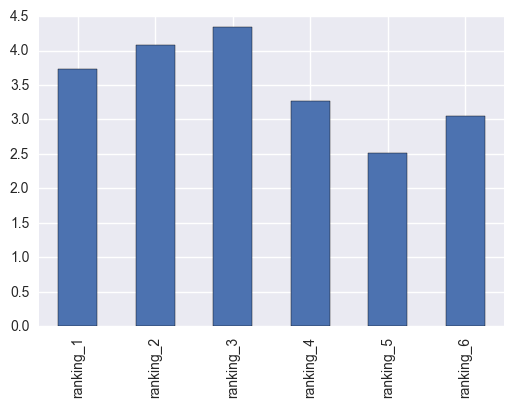

In [6]:
%matplotlib inline

star_wars[star_wars.columns[9:15]].mean()
star_wars[star_wars.columns[9:15]].mean().plot.bar()

The Empire Strikes Back was also the most seen of the two trilogies and the Revenge of the Sith was the least. This is in line with the rankings. 

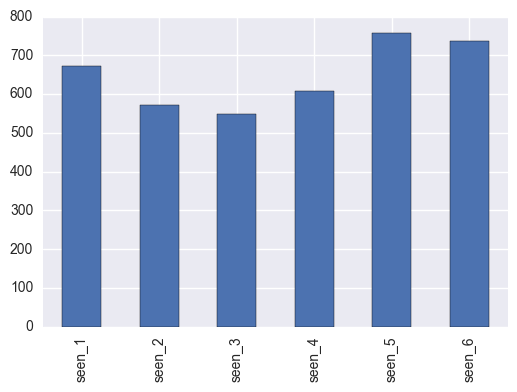

In [7]:
star_wars[star_wars.columns[3:9]].sum()
star_wars[star_wars.columns[3:9]].sum().plot.bar()

I wanted to know if there was a difference in rankings by gender, but in general the consensus is the same with regards to Episode 3 and 5. There's larger differences in average rankings for Episode 1 and 4. More females preferred Episode 1, and more males preferred Episode 4.

Gender       Female      Male
ranking_1  3.429293  4.037825
ranking_2  3.954660  4.224586
ranking_3  4.418136  4.274882
ranking_4  3.544081  2.997636
ranking_5  2.569270  2.458629
ranking_6  3.078086  3.002364


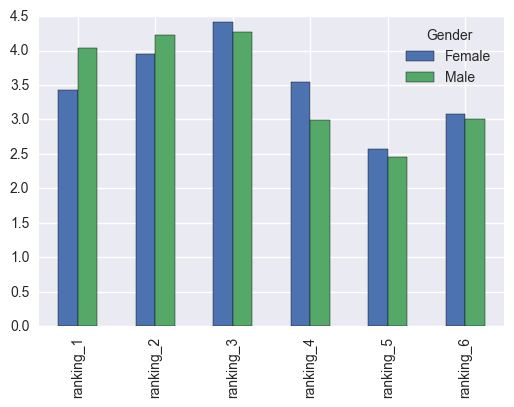

In [8]:
temp_df_ranks = star_wars[["Gender", "ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"]].copy()
grouped = temp_df_ranks.groupby(["Gender"]).mean()
print(grouped.transpose())
grouped.transpose().plot.bar()

More male respondents have seen the movies than females.

Gender    Female      Male
seen_1  0.542805  0.726358
seen_2  0.431694  0.649899
seen_3  0.404372  0.637827
seen_4  0.464481  0.688129
seen_5  0.642987  0.788732
seen_6  0.615665  0.778672


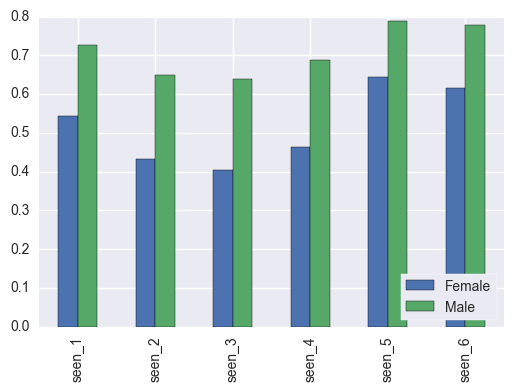

In [9]:
temp_df_seen = star_wars[["Gender", "seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]].copy()
grouped_total_seen = temp_df_seen.groupby(["Gender"]).sum()
grouped_total_responses = temp_df_seen.groupby(["Gender"]).count()
grouped_pct_seen = grouped_total_seen/grouped_total_responses
print(grouped_pct_seen.transpose())
grouped_pct_seen.transpose().plot.bar(legend=False)
plt.legend(loc=4,frameon=True)

The general age breakdown between males and females was similar. 

In [10]:
age_df = star_wars[["Gender", "Age", "RespondentID"]].copy()
grouped_age = age_df.groupby(["Gender", "Age"]).count()
print(grouped_age)
grouped_age_pcts = grouped_age.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
grouped_age_pcts

              RespondentID
Gender Age                
Female 18-29           114
       30-44           136
       45-60           151
       > 60            148
Male   18-29           104
       30-44           132
       45-60           140
       > 60            121


RespondentID
Gender Age                
Female 18-29     20.765027
       30-44     24.772313
       45-60     27.504554
       > 60      26.958106
Male   18-29     20.925553
       30-44     26.559356
       45-60     28.169014
       > 60      24.346076

### Favourite Character Results

I cleaned the columns associated with character preferences and assigned numeric scores.

In [11]:
#Get a list of unique survey results
print(star_wars["Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."].unique())

star_wars = star_wars.rename(columns={
        "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
        "Unnamed: 16": "Luke Skywalker",
        "Unnamed: 17": "Princess Leia Organa",
        "Unnamed: 18": "Anakin Skywalker",
        "Unnamed: 19": "Obi Wan Kenobi",
        "Unnamed: 20": "Emperor Palpatine",
        "Unnamed: 21": "Darth Vader",
        "Unnamed: 22": "Lando Calrissian",
        "Unnamed: 23": "Boba Fett",
        "Unnamed: 24": "C-3P0",
        "Unnamed: 25": "R2 D2",
        "Unnamed: 26": "Jar Jar Binks",
        "Unnamed: 27": "Padme Amidala",
        "Unnamed: 28": "Yoda",
})

character_scores = {
    "Very unfavorably": -2,
    "Somewhat unfavorably": -1,
    "Neither favorably nor unfavorably (neutral)": 0,
    "Somewhat favorably": 1,
    "Very favorably": 2,
    "Unfamiliar (N/A)": 0,
    np.nan: 0
}

for c in star_wars.columns[15:29]:
    star_wars[c] = star_wars[c].map(character_scores)
    
star_wars.head()

['Very favorably' nan 'Somewhat favorably'
 'Neither favorably nor unfavorably (neutral)' 'Somewhat unfavorably'
 'Unfamiliar (N/A)' 'Very unfavorably']


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,2,2,2,2,2,2,2,0,0,2,2,2,2,2,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,2,2,2,2,2,1,2,1,-1,2,2,2,2,2,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,2,1,1,-1,2,-2,1,0,2,1,1,-2,1,1,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The main protagonists in the story are the most favourable amongst all charactesr with Han Solo being the most popular. Jar Jar Binks is the only character with a negative score and is the most hated, of course.

Han Solo                1361
Yoda                    1330
Obi Wan Kenobi          1319
Luke Skywalker          1304
R2 D2                   1287
Princess Leia Organa    1280
C-3P0                   1140
Anakin Skywalker         598
Lando Calrissian         428
Padme Amidala            393
Darth Vader              391
Boba Fett                243
Emperor Palpatine         47
Jar Jar Binks           -156
dtype: int64


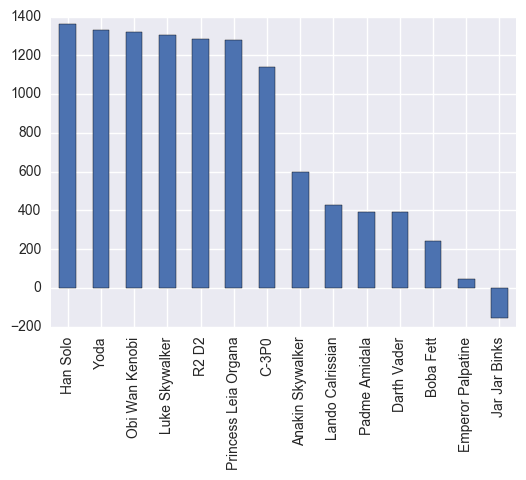

In [12]:
characters_df = star_wars[star_wars.columns[15:29]].sum().sort_values(ascending=False)
print(characters_df)
characters_df.plot.bar()

### Character Polarization

Below pie charts demonstrate the percentage of favourable and unfavourable scores to demonstrate if there are characters that are more polarizing than others. The protagonists received mostly favourable scores whereas the bad guys have more mixed results. Jar Jar Binks received a lot of unfavourable feedback.

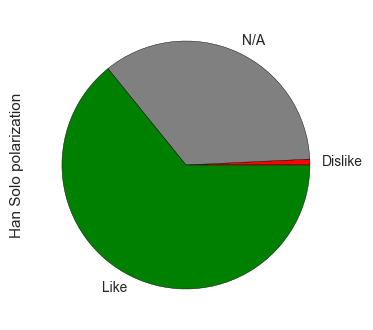

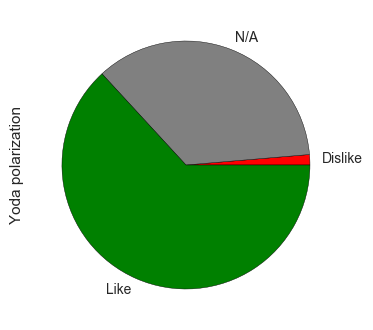

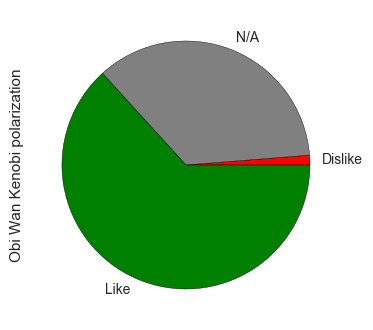

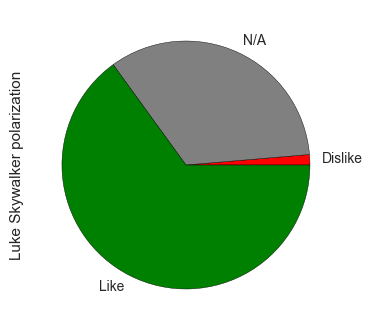

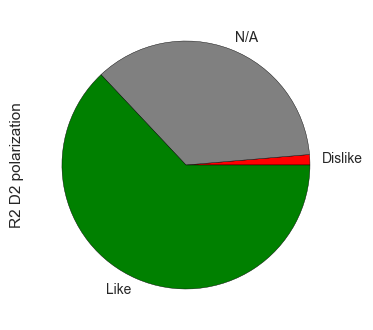

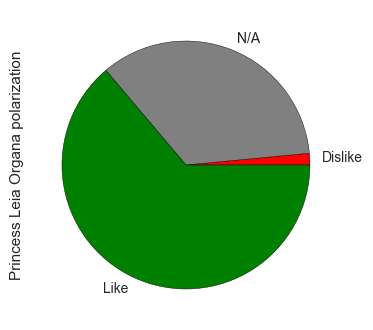

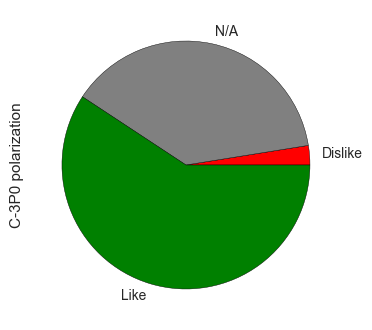

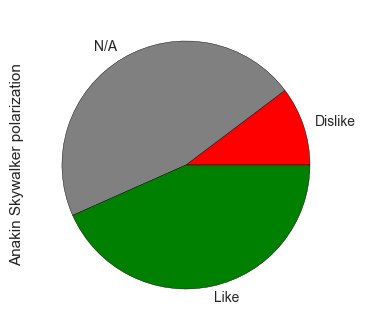

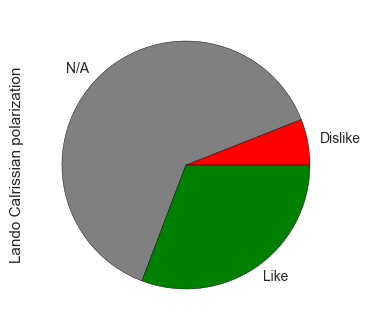

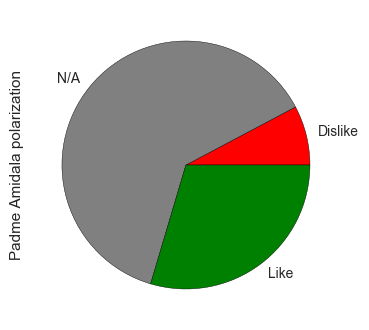

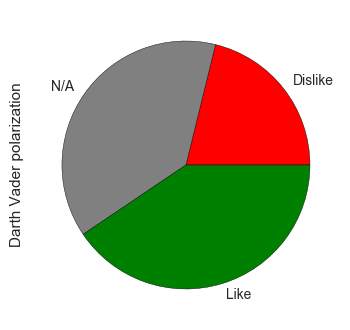

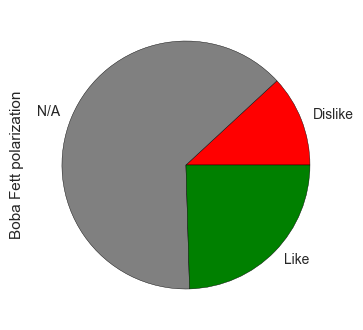

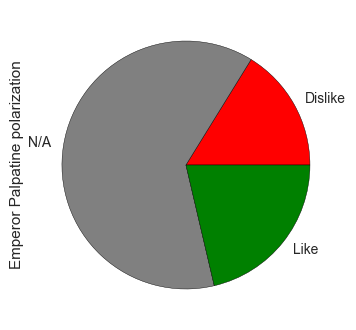

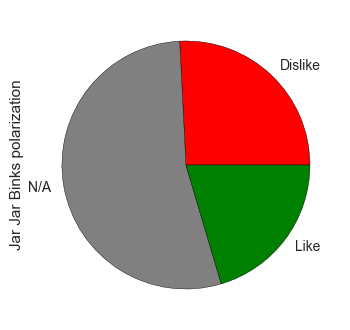

In [13]:
def polarization(row):
    if row > 0:
        return "Positive"
    elif row == 0:
        return "Neutral/No Answer"
    elif row < 0:
        return "Negative"
    
characters = ["Han Solo", "Yoda", "Obi Wan Kenobi", "Luke Skywalker", "R2 D2", "Princess Leia Organa", "C-3P0", "Anakin Skywalker", "Lando Calrissian", \
              "Padme Amidala", "Darth Vader", "Boba Fett", "Emperor Palpatine", "Jar Jar Binks"]

for c in characters:
    star_wars[c + " polarization"]= star_wars[c].apply(polarization)

value_count_df = star_wars[star_wars.columns[38:55]].apply(pd.Series.value_counts)

for c in characters:
    value_count_df[c + " polarization"].plot.pie(figsize=(4, 4), colors=['red','grey','green'], labels=['Dislike','N/A','Like'])
    plt.show()
